In [1]:
import pandas as pd
import os
import requests
import admin
import geocoder as gc
import time

In [70]:
df1 = admin.read_csv_files(r"C:\Users\THW_9\Desktop\LSE School\Dis\REALIS DATA\2024")

# To geocode and calculate address distance to boundaries

In [71]:
# This is to split the strings

df1 ['Address_Rd'] = df1['Address'].str.split(' #').str[0]
df1['Address_Rd'] = df1['Address_Rd'].str.replace(r'^\d+[A-Za-z]?\s+', '', regex=True)

def clean_address_rd(address):
    parts = str(address).split()
    if parts and any(char.isdigit() for char in parts[0]):
        parts = parts[1:]
    return ' '.join(parts)

df1['Address_Rd'] = df1['Address_Rd'].apply(clean_address_rd)

In [72]:
df1

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),...,Number of Units,Tenure,Completion Date,Purchaser Address Indicator,Postal Code,Postal District,Postal Sector,Planning Region,Planning Area,Address_Rd
0,THE LANDMARK,"2,726,888","1,076.4","2,533",01 Jan 2024,173 CHIN SWEE ROAD #22-11,New Sale,Strata,100,"27,269",...,1,99 yrs from 28/08/2020,Uncompleted,Private,169878,3,16,Central Region,Outram,CHIN SWEE ROAD
1,POLLEN COLLECTION,"3,850,000","1,808.35","2,129",01 Jan 2024,34 POLLEN PLACE,New Sale,Land,168,"22,917",...,1,99 yrs from 09/12/2019,Uncompleted,N.A,807233,28,80,North East Region,Serangoon,POLLEN PLACE
2,SKY EDEN@BEDOK,"2,346,000","1,087.16","2,158",01 Jan 2024,1 BEDOK CENTRAL #09-10,New Sale,Strata,101,"23,228",...,1,99 yrs from 05/01/2022,Uncompleted,HDB,469657,16,46,East Region,Bedok,BEDOK CENTRAL
3,TERRA HILL,"2,190,000",807.3,"2,713",01 Jan 2024,18A YEW SIANG ROAD #03-12,New Sale,Strata,75,"29,200",...,1,Freehold,Uncompleted,N.A,118992,5,11,Central Region,Queenstown,YEW SIANG ROAD
4,PINETREE HILL,"1,954,000",796.54,"2,453",01 Jan 2024,36 PINE GROVE #05-18,New Sale,Strata,74,"26,405",...,1,99 yrs from 12/09/2022,Uncompleted,Private,598444,21,59,Central Region,Bukit Timah,PINE GROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25089,SAVOY PARK,"4,050,000","1,979.5","2,046",31 Dec 2024,16 ENG KONG DRIVE,Resale,Land,183.9,"22,023",...,1,Freehold,1996,Private,599344,21,59,Central Region,Bukit Timah,ENG KONG DRIVE
25090,THE HILL @ONE-NORTH,"2,595,000","1,033.34","2,511",31 Dec 2024,17 SLIM BARRACKS RISE #09-15,New Sale,Strata,96,"27,031",...,1,99 yrs from 10/01/2022,Uncompleted,Private,139744,5,13,Central Region,Queenstown,SLIM BARRACKS RISE
25091,HILLTOPS,"5,320,000","1,593.07","3,339",31 Dec 2024,101 CAIRNHILL CIRCLE #06-03,Resale,Strata,148,"35,946",...,1,Freehold,2011,Private,229809,9,22,Central Region,Newton,CAIRNHILL CIRCLE
25092,SERANGOON GARDEN ESTATE,"7,880,000","4,199.04","1,877",31 Dec 2024,5 MEDWAY DRIVE,Resale,Land,390.1,"20,200",...,1,999 yrs from 01/01/1953,-,Private,556501,19,55,North East Region,Serangoon,MEDWAY DRIVE


In [73]:
# Group by 'Address_Rd' and count the number of rows for each
df_summary = df1.groupby('Address_Rd').size().reset_index(name='count')

# Display the summary DataFrame
df_summary

,Address_Rd,count
0,ADAM ROAD,4
1,ADIS ROAD,6
2,AH HOOD ROAD,4
3,AIDA STREET,3
4,AKYAB ROAD,7
...,...,...
1469,YUNNAN CRESCENT,1
1470,YUNNAN ROAD,2
1471,ZEHNDER ROAD,1
1472,ZION CLOSE,3


In [74]:
#sum the counts of df_summary
total_count = df_summary['count'].sum()
# Display the total count
print(f"Total count of unique 'Address_Rd': {total_count}")

Total count of unique 'Address_Rd': 25094


In [9]:
for i in range(0,len(df_summary)):
    print(i)
    address = df_summary['Address_Rd'][i]
    lat_long = gc.one_map_geocode(address)
    #wait for 1 minute to avoid rate limiting
    #if i % 500 == 0:
    #    time.sleep(60)  # Sleep for 60 seconds
    if lat_long:
        df_summary.at[i, 'lat'] = lat_long[0]
        df_summary.at[i, 'long'] = lat_long[1]
    else:
        df_summary.at[i, 'lat'] = None
        df_summary.at[i, 'long'] = None

0
ADAM ROAD  :  ADAM ROAD
1
ADIS ROAD  :  ADIS ROAD
2
AH HOOD ROAD  :  AH HOOD ROAD
3
AIDA STREET  :  AIDA STREET
4
AKYAB ROAD  :  AKYAB ROAD
5
ALEXANDRA ROAD  :  ALEXANDRA ROAD
6
ALEXANDRA VIEW  :  ALEXANDRA VIEW
7
ALJUNIED ROAD  :  ALJUNIED ROAD
8
ALMOND AVENUE  :  ALMOND AVENUE
9
ALMOND CRESCENT  :  ALMOND CRESCENT
10
ALMOND STREET  :  ALMOND STREET
11
ALNWICK ROAD  :  ALNWICK ROAD
12
AMBER GARDENS  :  AMBER GARDENS
13
AMBER ROAD  :  AMBER ROAD
14
ANAMALAI AVENUE  :  ANAMALAI AVENUE
15
ANCHORVALE CRESCENT  :  ANCHORVALE CRESCENT
16
ANCHORVALE LANE  :  ANCHORVALE LANE
17
ANDERSON ROAD  :  ANDERSON ROAD
18
ANDREWS AVENUE  :  ANDREWS TERRACE ANDREWS AVE PUMP SUMP
19
ANDREWS TERRACE  :  ANDREWS TERRACE
20
ANG MO KIO AVENUE 1  :  ANG MO KIO AVENUE 1
21
ANG MO KIO AVENUE 2  :  ANG MO KIO AVENUE 2
22
ANG MO KIO AVENUE 8  :  ANG MO KIO AVENUE 8
23
ANG MO KIO AVENUE 9  :  ANG MO KIO AVENUE 9
24
ANG MO KIO CENTRAL 3  :  ANG MO KIO CENTRAL 3
25
ANG MO KIO RISE  :  23 ANG MO KIO RISE AMO RESIDE

In [10]:
#save the df_summary to csv
#df_summary.to_csv('df_summary_latlong.csv') 

# Regarding distance to CBD and distance to train stations

In [7]:
df1 ['Street_Address'] = df1['Address'].str.split(' #').str[0]
df_street_address = df1.groupby('Street_Address').size().reset_index(name='count')


In [12]:
for i in range(124,len(df_street_address)):
    print(i)
    address = df_street_address['Street_Address'][i]
    lat_long = gc.one_map_geocode(address)
    #wait for 1 minute to avoid rate limiting
    #if i % 500 == 0:
    #    time.sleep(60)  # Sleep for 60 seconds
    if lat_long:
        df_street_address.at[i, 'lat'] = lat_long[0]
        df_street_address.at[i, 'long'] = lat_long[1]
    else:
        df_street_address.at[i, 'lat'] = None
        df_street_address.at[i, 'long'] = None

124
1 SENGKANG EAST AVENUE
1 SENGKANG EAST AVENUE  :  1 SENGKANG EAST AVENUE RIVERSOUND RESIDENCE SINGAPORE 544811
125
1 SENNETT PLACE
1 SENNETT PLACE  :  1 SENNETT PLACE EAST COAST HILL SINGAPORE 466837
126
1 SERANGOON NORTH VIEW
1 SERANGOON NORTH VIEW  :  1 SERANGOON NORTH VIEW THE GARDEN RESIDENCES SINGAPORE 554343
127
1 SHENTON WAY
1 SHENTON WAY  :  1 SHENTON WAY ONE SHENTON SINGAPORE 068803
128
1 SIGLAP HILL
1 SIGLAP HILL  :  1 SIGLAP HILL FRANKEL ESTATE SINGAPORE 456061
129
1 SIGLAP ROAD
1 SIGLAP ROAD  :  1 SIGLAP ROAD MANDARIN GARDENS SINGAPORE 448906
130
1 SIMEI STREET 3
1 SIMEI STREET 3  :  1 SIMEI STREET 3 EASTPOINT GREEN SINGAPORE 529890
131
1 SIMEI STREET 4
1 SIMEI STREET 4  :  1 SIMEI STREET 4 SIMEI GREEN CONDOMINIUM SINGAPORE 529861
132
1 SIN MING AVENUE
1 SIN MING AVENUE  :  1 SIN MING AVENUE FLAME TREE PARK SINGAPORE 575728
133
1 SIN MING WALK
1 SIN MING WALK  :  1 SIN MING WALK THE GARDENS AT BISHAN SINGAPORE 575574
134
1 SOMMERVILLE WALK
1 SOMMERVILLE WALK  :  1 SOMME

ReadTimeout: HTTPSConnectionPool(host='www.onemap.gov.sg', port=443): Read timed out. (read timeout=None)

In [13]:
#df_street_address.to_csv('df_street_address_latlong[184].csv')

# After geoprocessing, to merge back

In [14]:
#read csv
df_dist = pd.read_csv(r"C:\Users\THW_9\Desktop\LSE School\Dis\GIS\RD_distance1945_distCBD.csv")

In [75]:
df_dist = pd.read_csv(r"C:\Users\THW_9\Desktop\LSE School\Dis\GIS\RD_downtown_distance1945_distCBD.csv")

In [76]:
df_dist

# replace NaN with zeros in 'Polygon' column
df_dist['Polygon'] = df_dist['Polygon'].fillna(0)

df_dist['signed_distance'] = df_dist['Distance'] * (df_dist['Polygon'] - 1)  # Create a new column for signed distance

#if polygon is 1, make distance negative
df_dist.loc[df_dist['Polygon'] == 1, 'signed_distance'] = df_dist['Distance']

In [77]:
df_dist.head()

,InputID,TargetID,Distance,Polygon,DistCBD,signed_distance
0,ADAM ROAD,1,3609.122003,0.0,2814.825608,-3609.122003
1,ADIS ROAD,1,116.358457,0.0,1696.483845,-116.358457
2,AH HOOD ROAD,1,1687.869192,0.0,3402.178602,-1687.869192
3,AIDA STREET,1,6995.934382,0.0,2459.337620,-6995.934382
4,AIDA STREET,1,6995.934382,0.0,2459.337620,-6995.934382


In [78]:
#clean up for duplicate 'InputID'

df_dist = df_dist.drop_duplicates(subset=['InputID'])
df_dist

,InputID,TargetID,Distance,Polygon,DistCBD,signed_distance
0,ADAM ROAD,1,3609.122003,0.0,2814.825608,-3609.122003
1,ADIS ROAD,1,116.358457,0.0,1696.483845,-116.358457
2,AH HOOD ROAD,1,1687.869192,0.0,3402.178602,-1687.869192
3,AIDA STREET,1,6995.934382,0.0,2459.337620,-6995.934382
5,AKYAB ROAD,1,1243.064893,0.0,3402.178602,-1243.064893
...,...,...,...,...,...,...
1750,YUNNAN CRESCENT,1,16380.724270,0.0,2394.949289,-16380.724270
1751,YUNNAN ROAD,1,16476.033788,0.0,2394.949289,-16476.033788
1752,ZEHNDER ROAD,1,5254.110747,0.0,2362.376630,-5254.110747
1753,ZION CLOSE,1,242.332769,0.0,2389.627980,-242.332769


In [79]:
# merge df1 'Address_Rd' with df_dist 'InputID'
df1 = df1.merge(df_dist, left_on='Address_Rd', right_on='InputID', how='left')

df1

,Project Name,Transacted Price ($),Area (SQFT),Unit Price ($ PSF),Sale Date,Address,Type of Sale,Type of Area,Area (SQM),Unit Price ($ PSM),...,Postal Sector,Planning Region,Planning Area,Address_Rd,InputID,TargetID,Distance,Polygon,DistCBD,signed_distance
0,THE LANDMARK,"2,726,888","1,076.4","2,533",01 Jan 2024,173 CHIN SWEE ROAD #22-11,New Sale,Strata,100,"27,269",...,16,Central Region,Outram,CHIN SWEE ROAD,CHIN SWEE ROAD,1,73.475315,1.0,1604.988631,73.475315
1,POLLEN COLLECTION,"3,850,000","1,808.35","2,129",01 Jan 2024,34 POLLEN PLACE,New Sale,Land,168,"22,917",...,80,North East Region,Serangoon,POLLEN PLACE,POLLEN PLACE,1,6966.063630,0.0,3671.167854,-6966.063630
2,SKY EDEN@BEDOK,"2,346,000","1,087.16","2,158",01 Jan 2024,1 BEDOK CENTRAL #09-10,New Sale,Strata,101,"23,228",...,46,East Region,Bedok,BEDOK CENTRAL,BEDOK CENTRAL,1,7854.408430,0.0,2459.337620,-7854.408430
3,TERRA HILL,"2,190,000",807.3,"2,713",01 Jan 2024,18A YEW SIANG ROAD #03-12,New Sale,Strata,75,"29,200",...,11,Central Region,Queenstown,YEW SIANG ROAD,YEW SIANG ROAD,1,4699.428269,0.0,2324.832726,-4699.428269
4,PINETREE HILL,"1,954,000",796.54,"2,453",01 Jan 2024,36 PINE GROVE #05-18,New Sale,Strata,74,"26,405",...,59,Central Region,Bukit Timah,PINE GROVE,PINE GROVE,1,6922.143959,0.0,2714.993549,-6922.143959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25089,SAVOY PARK,"4,050,000","1,979.5","2,046",31 Dec 2024,16 ENG KONG DRIVE,Resale,Land,183.9,"22,023",...,59,Central Region,Bukit Timah,ENG KONG DRIVE,ENG KONG DRIVE,1,8181.191459,0.0,2760.522152,-8181.191459
25090,THE HILL @ONE-NORTH,"2,595,000","1,033.34","2,511",31 Dec 2024,17 SLIM BARRACKS RISE #09-15,New Sale,Strata,96,"27,031",...,13,Central Region,Queenstown,SLIM BARRACKS RISE,SLIM BARRACKS RISE,1,4888.070440,0.0,2394.949289,-4888.070440
25091,HILLTOPS,"5,320,000","1,593.07","3,339",31 Dec 2024,101 CAIRNHILL CIRCLE #06-03,Resale,Strata,148,"35,946",...,22,Central Region,Newton,CAIRNHILL CIRCLE,CAIRNHILL CIRCLE,1,14.429402,1.0,2731.781027,14.429402
25092,SERANGOON GARDEN ESTATE,"7,880,000","4,199.04","1,877",31 Dec 2024,5 MEDWAY DRIVE,Resale,Land,390.1,"20,200",...,55,North East Region,Serangoon,MEDWAY DRIVE,MEDWAY DRIVE,1,5017.814775,0.0,3679.949931,-5017.814775


# Regression 1: RDD 

In [30]:
# Import required libraries for RDD
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.preprocessing import PolynomialFeatures

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [80]:
df1['Unit Price ($ PSM)'] = df1['Unit Price ($ PSM)'].replace({'\$': '', ',': ''}, regex=True).astype(float)

int

In [81]:
# Prepare data for RDD analysis
print("Data preparation for RDD...")

# Remove rows with missing key variables
rdd_data = df1.dropna(subset=['Unit Price ($ PSM)', 'signed_distance', 'Polygon', 'DistCBD', 'Completion Date']).copy()

# Create treatment variable (1 if inside historic boundary, 0 if outside)
rdd_data['treatment'] = (rdd_data['Polygon'] == 1).astype(int)

# Log transform the price for better model fit
rdd_data['log_price'] = np.log(rdd_data['Unit Price ($ PSM)'])

# Create running variable (distance to boundary)
rdd_data['distance'] = rdd_data['signed_distance']

print(f"Sample size: {len(rdd_data)}")
print(f"Treatment group (inside): {rdd_data['treatment'].sum()}")
print(f"Control group (outside): {len(rdd_data) - rdd_data['treatment'].sum()}")
print(f"Distance range: {rdd_data['distance'].min():.2f} to {rdd_data['distance'].max():.2f}")

# Create controls
rdd_data['dist_CBD'] = rdd_data['DistCBD'].fillna(0)  # Fill NaN values in DistCBD

# if completion date is "Uncompleted", set to 2024
for i in range(0,len(rdd_data)):
    if rdd_data.at[i,'Completion Date'] == 'Uncompleted':
        rdd_data.at[i,'Completion Date'] = 2024
    elif rdd_data.at[i,'Completion Date'] == '-': # remove this data
        rdd_data = rdd_data.drop(i)
    elif isinstance(rdd_data.at[i,'Completion Date'], str):
        rdd_data.at[i,'Completion Date'] = int(rdd_data.at[i,'Completion Date'])
rdd_data['building_age'] = 2024 - rdd_data['Completion Date']
rdd_data['building_age'] = rdd_data['building_age'].astype(int)

# Basic summary statistics
print("\nSummary Statistics by Treatment Status:")
print(rdd_data.groupby('treatment')[['log_price', 'Unit Price ($ PSM)', 'distance']].describe())

Data preparation for RDD...
Sample size: 25094
Treatment group (inside): 959
Control group (outside): 24135
Distance range: -16476.03 to 1516.81

Summary Statistics by Treatment Status:
          log_price                                                     \
              count       mean      std       min       25%        50%   
treatment                                                                
0           23425.0   9.863659  0.29911  7.989560  9.646011   9.864851   
1             951.0  10.073628  0.22906  9.192278  9.939868  10.052942   

                                Unit Price ($ PSM)                ...  \
                 75%        max              count          mean  ...   
treatment                                                         ...   
0          10.093364  10.992639            23425.0  20078.768879  ...   
1          10.237188  11.092276              951.0  24333.634069  ...   

                            distance                                         

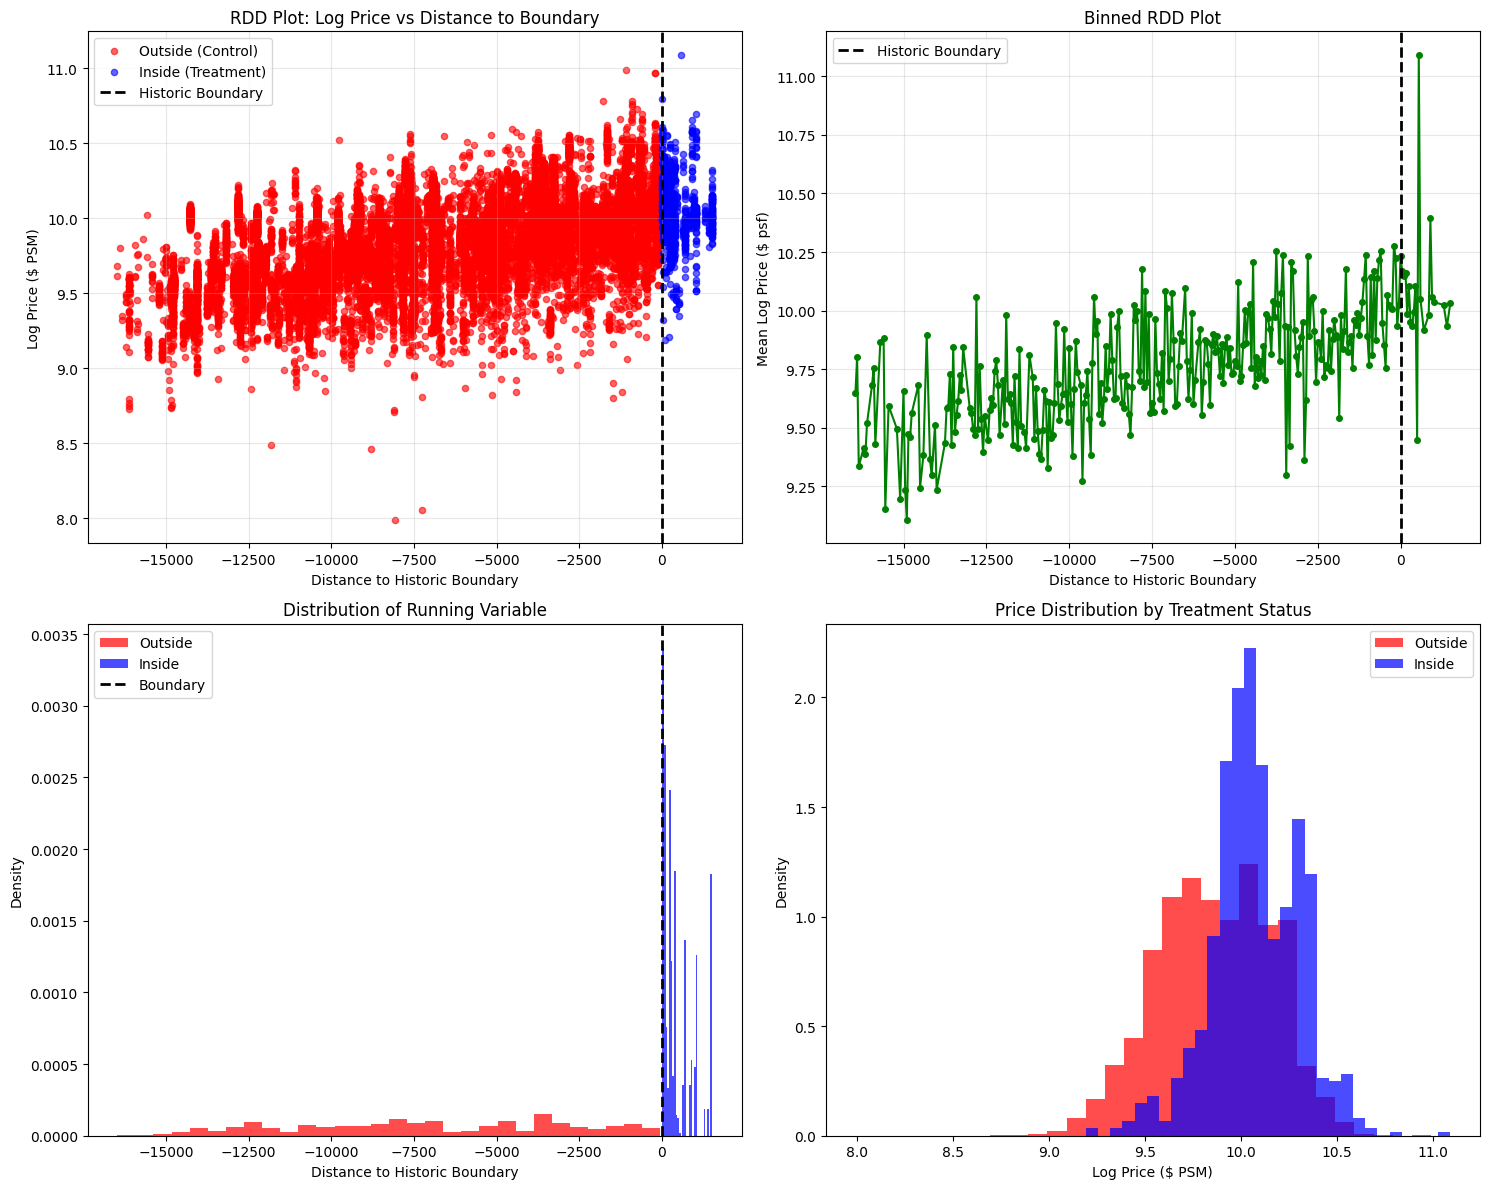

In [82]:
# RDD Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Scatter plot of price vs distance
axes[0,0].scatter(rdd_data[rdd_data['treatment']==0]['distance'], 
                  rdd_data[rdd_data['treatment']==0]['log_price'], 
                  alpha=0.6, color='red', label='Outside (Control)', s=20)
axes[0,0].scatter(rdd_data[rdd_data['treatment']==1]['distance'], 
                  rdd_data[rdd_data['treatment']==1]['log_price'], 
                  alpha=0.6, color='blue', label='Inside (Treatment)', s=20)
axes[0,0].axvline(x=0, color='black', linestyle='--', linewidth=2, label='Historic Boundary')
axes[0,0].set_xlabel('Distance to Historic Boundary')
axes[0,0].set_ylabel('Log Price ($ PSM)')
axes[0,0].set_title('RDD Plot: Log Price vs Distance to Boundary')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Binned scatter plot for cleaner visualization
bin_size = 50  # meters
bins = np.arange(rdd_data['distance'].min(), rdd_data['distance'].max() + bin_size, bin_size)
bin_centers = []
bin_means = []

for i in range(len(bins)-1):
    mask = (rdd_data['distance'] >= bins[i]) & (rdd_data['distance'] < bins[i+1])
    if mask.sum() > 0:
        bin_centers.append((bins[i] + bins[i+1]) / 2)
        bin_means.append(rdd_data[mask]['log_price'].mean())

axes[0,1].plot(bin_centers, bin_means, 'o-', color='green', markersize=4)
axes[0,1].axvline(x=0, color='black', linestyle='--', linewidth=2, label='Historic Boundary')
axes[0,1].set_xlabel('Distance to Historic Boundary')
axes[0,1].set_ylabel('Mean Log Price ($ psf)')
axes[0,1].set_title('Binned RDD Plot')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 3. Histogram of running variable
axes[1,0].hist(rdd_data[rdd_data['treatment']==0]['distance'], 
               bins=30, alpha=0.7, color='red', label='Outside', density=True)
axes[1,0].hist(rdd_data[rdd_data['treatment']==1]['distance'], 
               bins=30, alpha=0.7, color='blue', label='Inside', density=True)
axes[1,0].axvline(x=0, color='black', linestyle='--', linewidth=2, label='Boundary')
axes[1,0].set_xlabel('Distance to Historic Boundary')
axes[1,0].set_ylabel('Density')
axes[1,0].set_title('Distribution of Running Variable')
axes[1,0].legend()

# 4. Price distribution by treatment
axes[1,1].hist(rdd_data[rdd_data['treatment']==0]['log_price'], 
               bins=30, alpha=0.7, color='red', label='Outside', density=True)
axes[1,1].hist(rdd_data[rdd_data['treatment']==1]['log_price'], 
               bins=30, alpha=0.7, color='blue', label='Inside', density=True)
axes[1,1].set_xlabel('Log Price ($ PSM)')
axes[1,1].set_ylabel('Density')
axes[1,1].set_title('Price Distribution by Treatment Status')
axes[1,1].legend()

plt.tight_layout()
plt.show()

In [83]:
# Choose a bandwidth (e.g., 500 meters around the boundary)
bandwidth = 1500
rdd_sample = rdd_data[abs(rdd_data['distance']) <= bandwidth]

# Run OLS regression: log_price ~ treatment + distance + distance^2
rdd_sample['distance_sq'] = rdd_sample['distance'] ** 2

model = smf.ols('log_price ~ treatment + distance + treatment * distance + building_age', data=rdd_sample).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 02 Jul 2025   Prob (F-statistic):          9.33e-315
Time:                        18:32:59   Log-Likelihood:                 458.97
No. Observations:                3105   AIC:                            -907.9
Df Residuals:                    3100   BIC:                            -877.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.3012      0

C:\Users\THW_9\AppData\Local\Temp\ipykernel_24408\2929647533.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdd_sample['distance_sq'] = rdd_sample['distance'] ** 2


# To Test for British Names in the address

In [11]:
british_syllabary = ['Brighton'] #change this to the list of British names 

df_summary['british_name'] = 0

#if 'Address_Rd' contains any of the names in british_syllabary, set 'british_name' to 1

for i in range(0,len(df_summary)):
    for name in british_syllabary:
        if name.upper() in df_summary['Address_Rd'][i]:
            df_summary['british_name'][i] = 1
            break

C:\Users\THW_9\AppData\Local\Temp\ipykernel_17828\1662242957.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary['british_name'][i] = 1
C:\Users\THW_9\AppData\Local\Temp\ipykernel_17828\1662242957.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary['british_name'][i] = 1


In [12]:
df_summary.loc[df_summary['british_name']==1]

,Address_Rd,count,british_name
99,BRIGHTON AVENUE,1,1
100,BRIGHTON CRESCENT,5,1
